# House Prices Prediction Using Linear regression

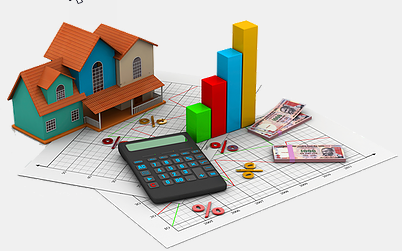

# Problem Statement

The goal of this statistical analysis is to help us understand the relationship between house features and how these variables are used to predict house price.

# Plan

* **Exploratory Data Analysis (EDA)**
* **Dataset Preparation (Splitting)**
* **Model Selection and Evaluation**

# Step 1: Exploratory Data Analysis (EDA)

First, Let’s import the data and have a look to see what kind of data we are dealing with:

In [2]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


In [65]:
#import Data
data = pd.read_csv('home_data.csv', parse_dates=["date"])

In [4]:
# read first 5 rows
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


The following features have been provided:

✔️**Date:** Date house was sold

✔️**Price:** Price is prediction target

✔️**Bedrooms:** Number of Bedrooms/House

✔️**Bathrooms:** Number of bathrooms/House

✔️**Sqft_Living:** square footage of the home

✔️**Sqft_Lot:** square footage of the lot

✔️**Floors:** Total floors (levels) in house

✔️**Waterfront:** House which has a view to a waterfront

✔️**View:** Has been viewed

✔️**Condition:** How good the condition is ( Overall )

✔️**Grade:** grade given to the housing unit, based on King County grading system

✔️**Sqft_Above:** square footage of house apart from basement

✔️**Sqft_Basement:** square footage of the basement

✔️**Yr_Built:** Built Year

✔️**Yr_Renovated:** Year when house was renovated

✔️**Zipcode:** Zip

✔️**Lat:** Latitude coordinate

✔️**Long:** Longitude coordinate

✔️**Sqft_Living15:** Living room area in 2015(implies — some renovations)

✔️**Sqft_Lot15:** lotSize area in 2015(implies — some renovations)

# **EDA**

In [5]:
#display some info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  int64         
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [12]:
# print some statistical insights
pd.options.display.float_format = '{:,.2f}'.format
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,"21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00"
mean,"540,088.14",3.37,2.11,"2,079.90","15,106.97",1.49,0.01,0.23,3.41,7.66,"1,788.39",291.51,"1,971.01",84.40,"98,077.94",47.56,-122.21,"1,986.55","12,768.46"
std,"367,127.20",0.93,0.77,918.44,"41,420.51",0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,"27,304.18"
min,"75,000.00",0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,"1,900.00",0.00,"98,001.00",47.16,-122.52,399.00,651.00
25%,"321,950.00",3.00,1.75,"1,427.00","5,040.00",1.00,0.00,0.00,3.00,7.00,"1,190.00",0.00,"1,951.00",0.00,"98,033.00",47.47,-122.33,"1,490.00","5,100.00"
50%,"450,000.00",3.00,2.25,"1,910.00","7,618.00",1.50,0.00,0.00,3.00,7.00,"1,560.00",0.00,"1,975.00",0.00,"98,065.00",47.57,-122.23,"1,840.00","7,620.00"
75%,"645,000.00",4.00,2.50,"2,550.00","10,688.00",2.00,0.00,0.00,4.00,8.00,"2,210.00",560.00,"1,997.00",0.00,"98,118.00",47.68,-122.12,"2,360.00","10,083.00"
max,"7,700,000.00",33.00,8.00,"13,540.00","1,651,359.00",3.50,1.00,4.00,5.00,13.00,"9,410.00","4,820.00","2,015.00","2,015.00","98,199.00",47.78,-121.31,"6,210.00","871,200.00"


In [5]:
#check if we have some missing values
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [66]:
numeric_data = data.select_dtypes(include=np.number)
corrMatrix = numeric_data.corr()

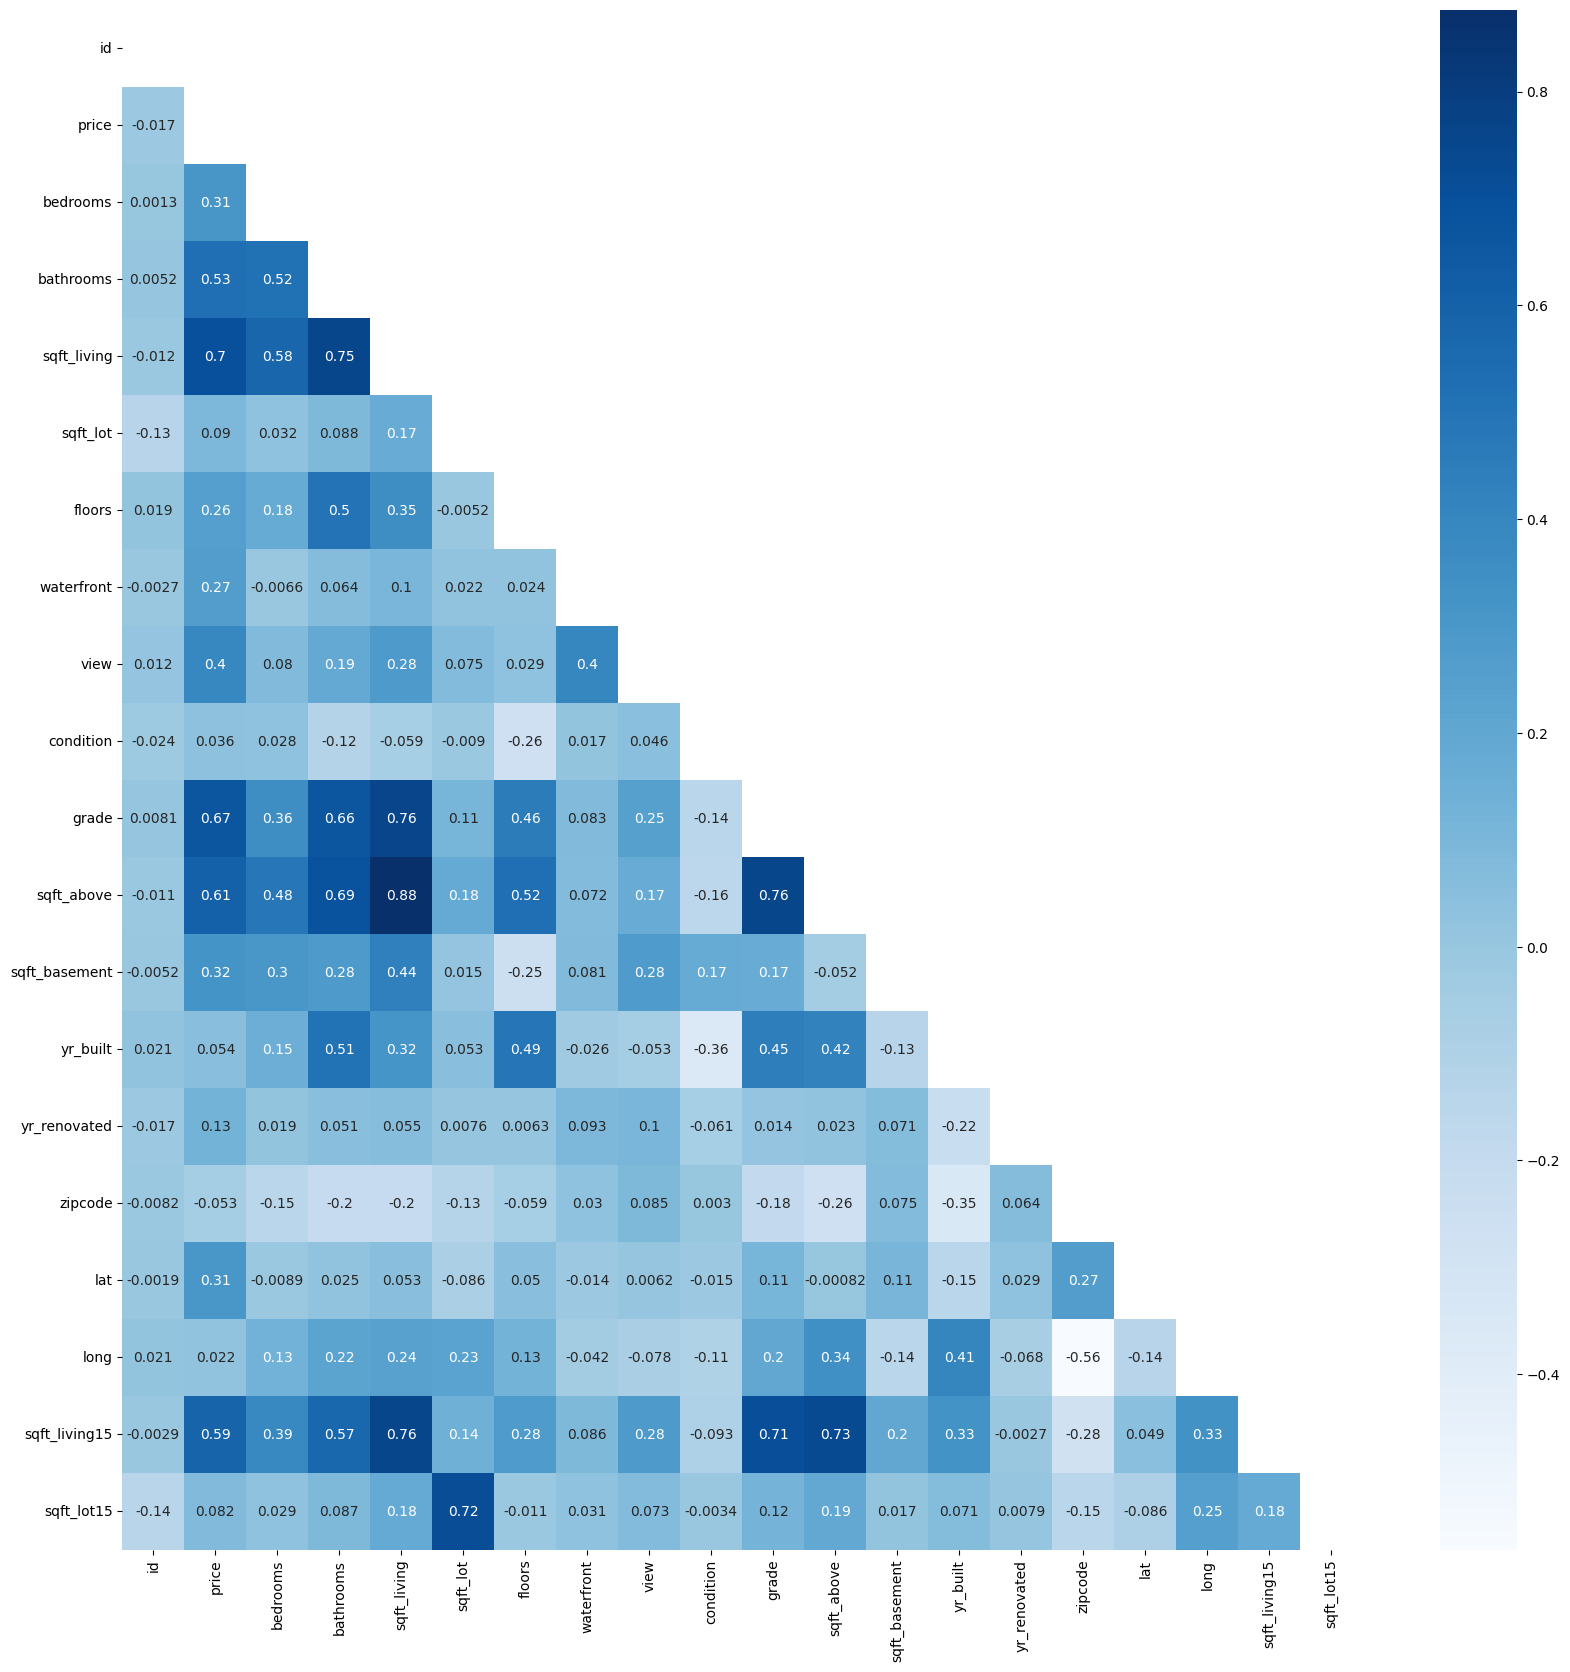

In [67]:
#check the correlation between my variables
ax , fig = plt.subplots(figsize=(20,20))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
sns.heatmap(corrMatrix , mask=mask, annot=True,cmap="Blues")
plt.show()

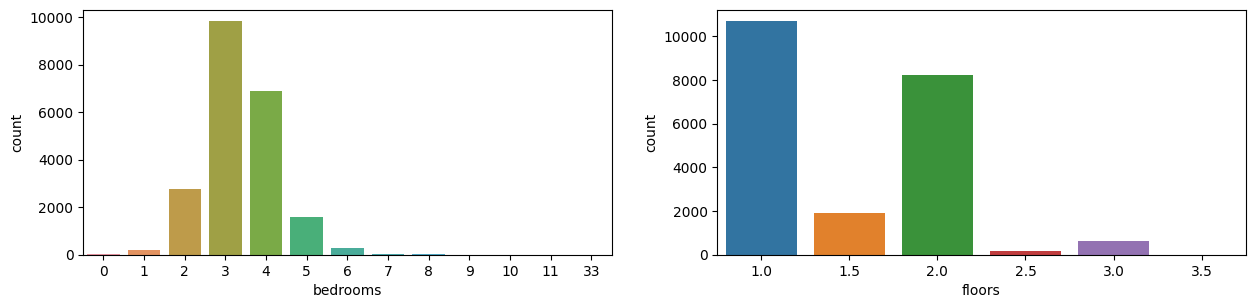

In [15]:
# Create a figure with a specified size
fig = plt.figure(figsize=(15, 7))

# Add subplots to the figure (2 rows, 2 columns, and this is the first subplot)
fig.add_subplot(2, 2, 1)

# Create a countplot for the 'bedrooms' variable
sns.countplot(x=data['bedrooms'])

# Add another subplot to the figure (2 rows, 2 columns, and this is the second subplot)
fig.add_subplot(2, 2, 2)

# Create a countplot for the 'floors' variable
sns.countplot(x=data['floors'])

# Display the plot
plt.show()

# Step 2: Dataset Cleaning & Preprocessing


In [68]:
# add new three columns to the data representing the day , month and the year
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

#delete the date column
data.drop("date",axis=1,inplace=True)

#delete the id column
data.drop("id",axis=1,inplace=True)


Data is divided into the **Train set** and **Test set**. We use the Train set to make the algorithm learn the data’s behavior and then check the accuracy of our model on the Test set.
* **Features (X):** The columns that are inserted into our model will be used to make predictions.
* **Prediction (y):** Target variable that will be predicted by the features


**Separate the target variable and rest of the variables** 

In [31]:
y = data.price.values
X = data.drop('price',axis=1).values

We create the train and test set for cross-validation of the results using the **train_test_split** function from sklearn's model_selection module with test_size size equal to 20% of the data. Also, to maintain reproducibility of the results, a **random_state** is also assigned.

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Step 3: Model Selection and Evaluation

## Simple Linear Regression

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

## Estimating ("Learning") Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

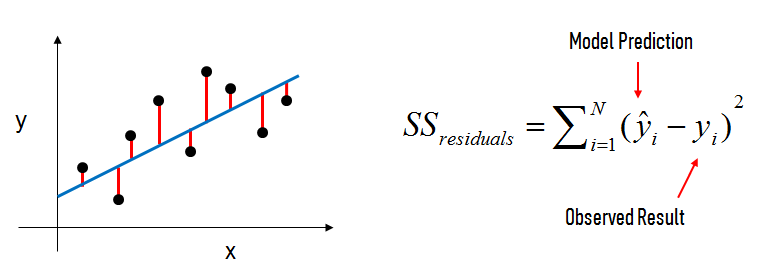

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:

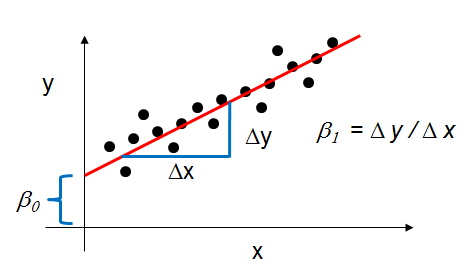

In [71]:
data['sqft_living'].values.shape

(21613,)

In [72]:
X_s = data['sqft_living'].values.reshape(-1,1)
y_s = data['price'].values

In [73]:
print(X_s.shape)
print(y_s.shape)

(21613, 1)
(21613,)


In [77]:
# Create a Linear Regression model
reg = LinearRegression()

# Fit the model using the 'sqft_living' as the independent variable and 'price' as the dependent variable
reg.fit(X_s, y_s)

# Predict the 'price' based on the fitted model
y_pred = reg.predict(X_s)

In [76]:
y_s

array([221900, 538000, 180000, ..., 402101, 400000, 325000])

In [78]:
y_pred

array([287555.06830062, 677621.82592138, 172499.40598082, ...,
       242655.29763923, 405416.96628675, 242655.29763923])

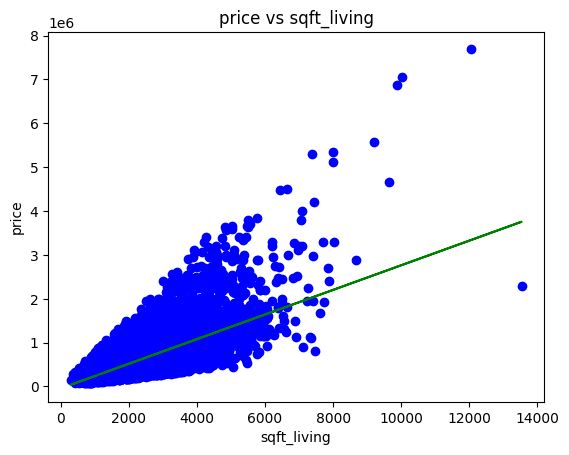

In [83]:
# Scatter plot of 'sqft_living' vs 'price'
plt.scatter(X_s, y_s, color="blue")

# Regression line plot
plt.plot(X_s, y_pred, color="green")

# Set plot title and labels
plt.title("price vs sqft_living")
plt.xlabel("sqft_living")
plt.ylabel("price")

# Display the plot
plt.show()


## How to evaluate the performance of our models?
The essential step in any machine learning model is to evaluate the accuracy of the model. The Mean Squared Error, Mean absolute error and R-Squared or Coefficient of determination metrics are used to evaluate the performance of the model in regression analysis.

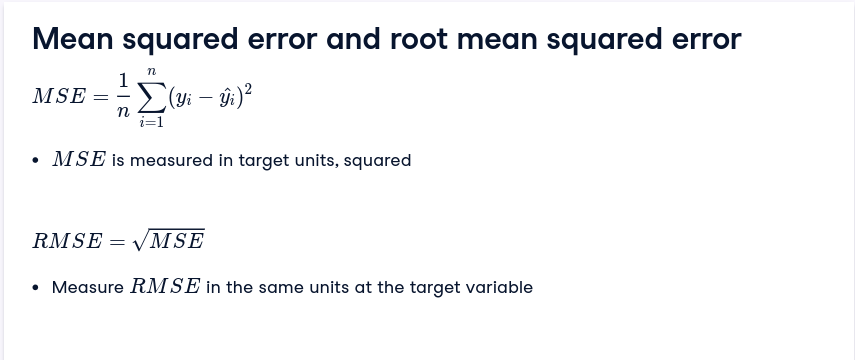

**Interpretation:**

* MSE provides a measure of the average squared deviation between the predicted and actual values.
* Because it squares the differences, **large deviations from the actual values are emphasized more in the calculation**.
* MSE is particularly **suitable for applications where accurately predicting extreme values or minimizing the impact of large errors is crucial**.
It's a valuable evaluation metric in various domains, including finance, engineering, and healthcare

### 2. R-squared :
R2 quantifies the proportion of the total variance in the dependent variable (the variable being predicted) that is explained by the independent variables (the predictors) in the regression model.
It is the most popular evaluation metric for regression models. The ideal ‘r2_score’ of a build should be more than 0.70 (at least > 0.60).

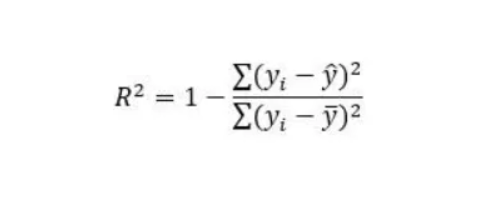

**Interpretation:**

* R2 values range from 0 to 1.
* An **R2 of 0** indicates that **the regression model does not explain any of the variability in the dependent variable**. This means that the model's predictions are no better than simply using the mean of the dependent variable for all predictions.
* An **R2 of 1** indicates that **the regression model perfectly explains all of the variability in the dependent variable**. This means that the model's predictions perfectly match the actual values.

## Let's Evaluate the model

In [84]:
#import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [85]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_s, response)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 68351287053.698746


In [86]:
# Calculate Root Mean Squared Error (MSE)
rmse = mean_squared_error(y_s, response, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 261440.79072267728


In [87]:
# Calculate R-squared (R2)
r_squared = r2_score(y_s, response)
print("R-squared (R2):", r_squared)

R-squared (R2): 0.492853214845565


## Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

In [88]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [89]:
# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

-72215248.96249102
[-3.49867322e+04  3.95215689e+04  1.12842730e+02  1.72527056e-01
  7.92127874e+03  6.06347322e+05  5.24654129e+04  2.76776549e+04
  9.37668063e+04  7.28627741e+01  3.99799554e+01 -2.60180163e+03
  2.12522081e+01 -5.69545123e+02  6.07135197e+05 -2.22027599e+05
  2.42620752e+01 -4.66538960e-01 -3.70676824e+02  1.35609828e+03
  3.79784552e+04]


In [90]:
y_pred=lm.predict(X_test)

## Evaluation on Test Data

In [91]:
# Calculate Root Mean Squared Error (MSE)
rmse = mean_squared_error(y_test, y_pred , squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 190033.37128096077


In [92]:
# Calculate R-squared (R2)
r_squared = r2_score(y_test, y_pred)
print("R-squared (R2):", r_squared)

R-squared (R2): 0.6963388259759755


## Overfitting, revisited

What is overfitting? Here are a few ways of explaining it:

- Building a model that matches the training set too closely.
- Building a model that does well on the training data, but doesn't generalize to out-of-sample data.
- Learning from the noise in the data, rather than just the signal.

# **Overfitting**
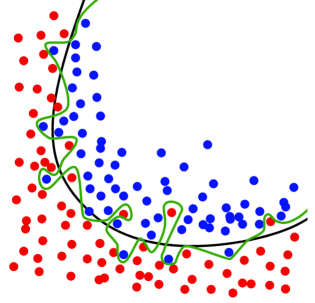

# **Underfitting vs Overfitting**
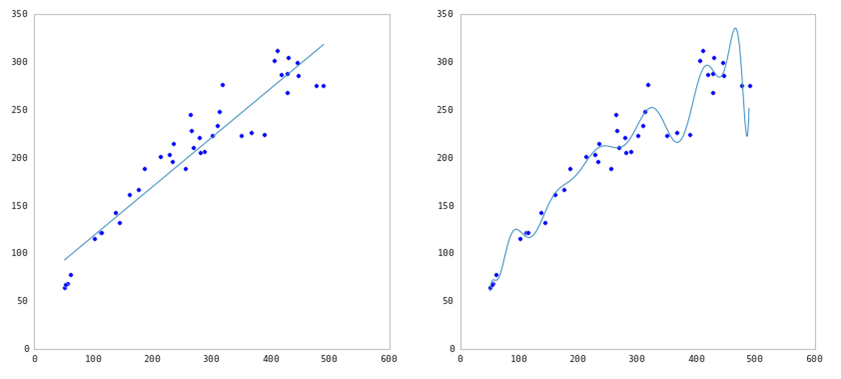

# **Overfitting with Linear Regression**


*   Linear models can overfit if you include irrelevant features.
*   Linear models can also overfit when the included features are highly correlated.
*   Linear models can also overfit if the coefficients are too large.


# **Regularization**

Regularization is a method for "constraining" or "regularizing" the size of the coefficients, thus "shrinking" them towards zero. It tends to reduce variance more than it increases bias, and thus minimizes overfitting.

Common regularization techniques for linear models:

- **Ridge regression** (also known as "L2 regularization"): shrinks coefficients toward zero (but they never reach zero)
- **Lasso regularization** (also known as "L1 regularization"): shrinks coefficients all the way to zero
- **ElasticNet regularization**: balance between Ridge and Lasso

Lasso regularization is useful if we believe many features are irrelevant, since a feature with a zero coefficient is essentially removed from the model. Thus, it is a useful technique for feature selection.

# **Ridge regression**

In [33]:

model = Ridge(alpha=1, random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)

In [34]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_pred,y_test)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 36104270823.70931


In [35]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_pred,y_test)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 121504.0721595581


In [36]:
# Calculate R-squared (R2)
r_squared = r2_score(test_pred,y_test)
print("R-squared (R2):", r_squared)

R-squared (R2): 0.5983434942122388


# **Lasso regression**

In [37]:
ls = Lasso(alpha=0.1, 
           precompute=True, 
              positive=True, 
              selection='random',
              random_state=42)
ls.fit(X_train, y_train)

test_pred = ls.predict(X_test)

In [38]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_pred,y_test)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 40181575656.80672


In [39]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_pred,y_test)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 128257.65734010203


In [40]:
# Calculate R-squared (R2)
r_squared = r2_score(test_pred,y_test)
print("R-squared (R2):", r_squared)

R-squared (R2): 0.5267980223237259
